<a href="https://colab.research.google.com/github/reema8mes/reema8mes/blob/main/hyper_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import os

In [52]:
os.chdir('/content/drive/MyDrive/fdp')

In [53]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [55]:
print(tf.__version__)

2.9.2


In [56]:
fashion_mnist = keras.datasets.fashion_mnist

In [57]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [58]:
np.min(train_images)

0

In [59]:
np.max(train_images)

255

In [60]:
np.min(test_images)

0

In [61]:
np.max(test_images)

255

In [62]:
train_images = train_images/255.0
test_images = test_images/255.0

In [63]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [64]:
train_images[0].shape

(28, 28)

In [65]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [66]:
import matplotlib.pyplot as plt

In [67]:
import seaborn as sns

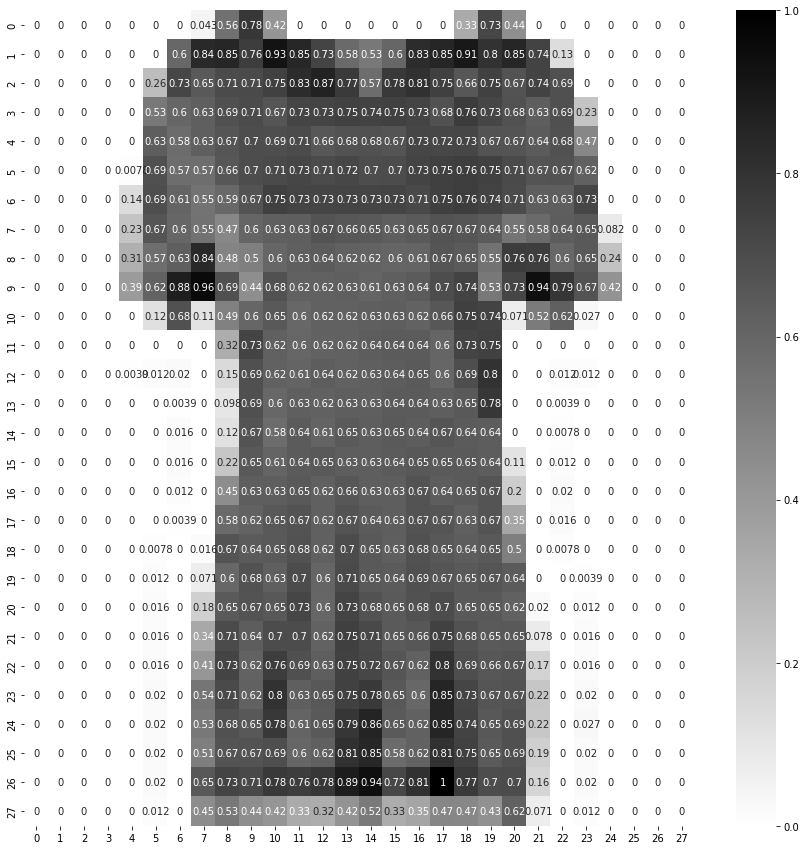

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(train_images[10],annot=True, cmap='binary')

In [69]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [70]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=8),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=8),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5,7]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [71]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [72]:
#outputis stored in uotput folder mnist fashion folder also can change the other tuning functions also
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [73]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

In [74]:
#best model can be get by this
model=tuner_search.get_best_models(num_models=1)[0]

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        41520     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 80)                1858640   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 1,903,466
Trainable params: 1,903,466
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1686 - accuracy: 0.9382 - val_loss: 0.2557 - val_accuracy: 0.9128
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1307 - accuracy: 0.9506 - val_loss: 0.3057 - val_accuracy: 0.9072
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1004 - accuracy: 0.9620 - val_loss: 0.3089 - val_accuracy: 0.9085
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0778 - accuracy: 0.9709 - val_loss: 0.3338 - val_accuracy: 0.9097
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0609 - accuracy: 0.9766 - val_loss: 0.3709 - val_accuracy: 0.9143
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0493 - accuracy: 0.9816 - val_loss: 0.4758 - val_accuracy: 0.9072
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0403 - accuracy: 0.9852 - val_loss: 0.4555 - val_accura

In [77]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5027 - accuracy: 0.9038


In [78]:
loss

0.5026829838752747

In [79]:
accuracy

0.9038000106811523

In [80]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.001
Score: 0.9104999899864197
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.001
Score: 0.9098333120346069
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 112
learning_rate: 0.001
Score: 0.909500002861023
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 32
learning_rate: 0.001
Score: 0.8981666564941406
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 112
learning_rate: 0.01
Score: 0.8684999942779541
